<a href="https://colab.research.google.com/github/gupta-aayushi/Digit-Classifier/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


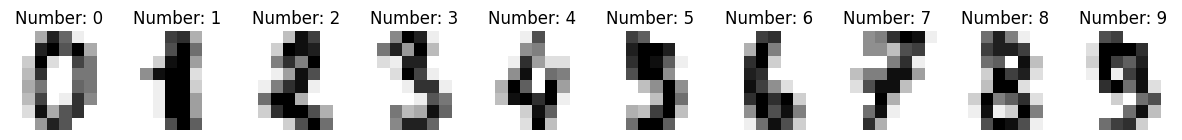

In [ ]:
digits = datasets.load_digits()
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(15, 10))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Number: %i" % label)
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
x_train, x_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5)


In [ ]:
x_train = x_train.reshape(x_train.shape[0], 8, 8)
x_test = x_test.reshape(x_test.shape[0], 8, 8)
input_shape = (8, 8, 1)

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (898, 8, 8)
Number of images in x_train 898
Number of images in x_test 899


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D (32, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(5, 5)))
model.add(Flatten())
model.add(Dense(256, activation=tf.nn.relu))
model.add(Dropout (0.2))
model.add(Dense(10, activation=tf.nn.softmax))

In [ ]:
prediction = model.evaluate(x_test, y_test)

29/29 [==============================] - 0s 2ms/step - loss: 0.1878 - accuracy: 0.9410


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x=x_train, y=y_train, epochs=500)

Epoch 1/500
29/29 [==============================] - 1s 5ms/step - loss: 0.4101 - accuracy: 0.8820
Epoch 2/500
29/29 [==============================] - 0s 5ms/step - loss: 0.3993 - accuracy: 0.8719
Epoch 3/500
29/29 [==============================] - 0s 5ms/step - loss: 0.4157 - accuracy: 0.8708
Epoch 4/500
29/29 [==============================] - 0s 5ms/step - loss: 0.3843 - accuracy: 0.8864
Epoch 5/500
29/29 [==============================] - 0s 5ms/step - loss: 0.3706 - accuracy: 0.8875
Epoch 6/500
29/29 [==============================] - 0s 6ms/step - loss: 0.3870 - accuracy: 0.8842
Epoch 7/500
29/29 [==============================] - 0s 5ms/step - loss: 0.3696 - accuracy: 0.8942
Epoch 8/500
29/29 [==============================] - 0s 5ms/step - loss: 0.3628 - accuracy: 0.8875
Epoch 9/500
29/29 [==============================] - 0s 5ms/step - loss: 0.3763 - accuracy: 0.8831
Epoch 10/500
29/29 [==============================] - 0s 5ms/step - loss: 0.3684 - accuracy: 0.8920
Epoch 11/